In [1]:

#Data Modeling!


In [2]:

import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
import joblib


In [3]:

df = pd.read_csv('../data/kaggle_dataset.csv')
df.info()
df['label'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1299 non-null   int64  
 1   id                   1299 non-null   int64  
 2   text                 1299 non-null   object 
 3   label                1299 non-null   object 
 4   word_count           1299 non-null   int64  
 5   char_count           1299 non-null   int64  
 6   avg_word_length      1299 non-null   float64
 7   punctuation_density  1299 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 81.3+ KB


array(['human', 'ai'], dtype=object)

In [4]:

#convert text labels to numeric labels
df['label'] = df['label'].replace({'human': 1, 'ai': 0})
print(df)


      Unnamed: 0    id                                               text  \
0              0     1        It always seems impossible until it's done.   
1              1     2     She finished the challenging crossword puzzle.   
2              2     3  You can't use up creativity. The more you use,...   
3              3     4  The journey of a thousand miles begins with a ...   
4              4     5  Life is short, and it is up to you to make it ...   
...          ...   ...                                                ...   
1294        1294  1295  The smart thermostat adjusted the temperature ...   
1295        1295  1296               Do your homework before watching TV.   
1296        1296  1297                 Life is a long lesson in humility.   
1297        1297  1298  The neural network learned to recognize differ...   
1298        1298  1299        The AI composed a melody based on her mood.   

      label  word_count  char_count  avg_word_length  punctuation_density  

In [5]:

# 1. Extract features and labels
X_text = df['text']         # <-- This is your raw text column
y = df['label']             # <-- This is your label column (0 = Human, 1 = AI)

# 2. Train-test split (both text and labels)
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42
)

# 3. Vectorize the text
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# 4. Base Model

# Base Model Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# 5. Predict
y_pred_lr = model_lr.predict(X_test)

# 6. Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_lr)

print(f"Accuracy Score for Baseline Model: {accuracy:.2f}")


Accuracy Score for Baseline Model: 0.95


In [6]:

#Model Evaluation!

# 1. Train the Naive Bayes model
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

# 2. Predict
y_pred_nb = model_nb.predict(X_test)

# 3. Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_nb)

print(f"Accuracy Score for Baseline Model: {accuracy:.2f}")

# 4. Create a DataFrame to display results
results_df = pd.DataFrame({
    'Text': X_test_text.values,        # <-- raw test text
    'Actual Label': y_test.values,     # <-- true label
    'Predicted Label': y_pred_nb       # <-- predicted label
})

# 5. Convert numeric labels to human-readable format
label_map = df['label'] 
results_df['Actual Label'] = results_df['Actual Label'].map(label_map)
results_df['Predicted Label'] = results_df['Predicted Label'].map(label_map)

# 6. Display first 10 rows
results_df


Accuracy Score for Baseline Model: 0.97


,Text,Actual Label,Predicted Label
0,The old library had an atmosphere of mystery a...,1,0
1,The intelligent transportation system optimize...,1,1
2,Finish your breakfast before leaving.,0,0
3,The automated factory produced a car from star...,1,1
4,The police officer directed traffic at the bus...,1,1
...,...,...,...
255,It does not do to dwell on dreams and forget t...,0,0
256,The intelligent lighting system adjusted to am...,1,1
257,"Nothing is impossible, the word itself says 'I...",0,0
258,"The cat stared at the closed door, waiting pat...",1,1


In [7]:

# checks for wrong predictions
wrong_predictions = results_df[results_df['Actual Label'] != results_df['Predicted Label']]

# Display wrongly predicted rows
print("All Wrongly Predicted Text:")
wrong_predictions[['Text', 'Actual Label', 'Predicted Label']]


All Wrongly Predicted Text:


,Text,Actual Label,Predicted Label
0,The old library had an atmosphere of mystery a...,1,0
11,The greatest trick the Devil ever pulled was c...,0,1
62,"He tried to hide his excitement, but his smile...",1,0
93,The bookend kept the row of novels upright.,1,0
127,"I enjoy learning new skills, even if I fail at...",1,0
134,History often repeats itself in surprising ways.,1,0
168,The trash can was nearly full.,1,0
177,Innovation distinguishes between a leader and ...,0,1
194,Cloud computing has made storage more accessib...,1,0


In [8]:

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n", cm)

# Get a full classification report
report = classification_report(y_test, y_pred_nb)
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[124   7]
 [  2 127]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       131
           1       0.95      0.98      0.97       129

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260



## Summary

The classification model demonstrates strong overall performance, achieving an **accuracy of 97%** on the test dataset. The confusion matrix indicates that the model correctly classified most instances of both classes, with only **9 misclassifications out of 260 total samples**.

- **Class 0** shows a **precision of 0.98** and a **recall of 0.95**, indicating that while the model is very accurate in predicting class 0, a few actual class 0 instances were misclassified.
- **Class 1** exhibits a **precision of 0.95** and a **recall of 0.98**, meaning the model captures nearly all actual class 1 instances, with very few false positives.

Both the **macro** and **weighted averages** for precision, recall, and F1-score are **0.97**, reflecting balanced performance across the two classes. These results suggest that the model generalizes well and performs reliably across both categories.

- It was especially good at identifying both types of cases, with only a small number of errors.
- Overall, the model is accurate, reliable, and balanced in its decisions.

These results show that the model can be trusted to make correct predictions most of the time.



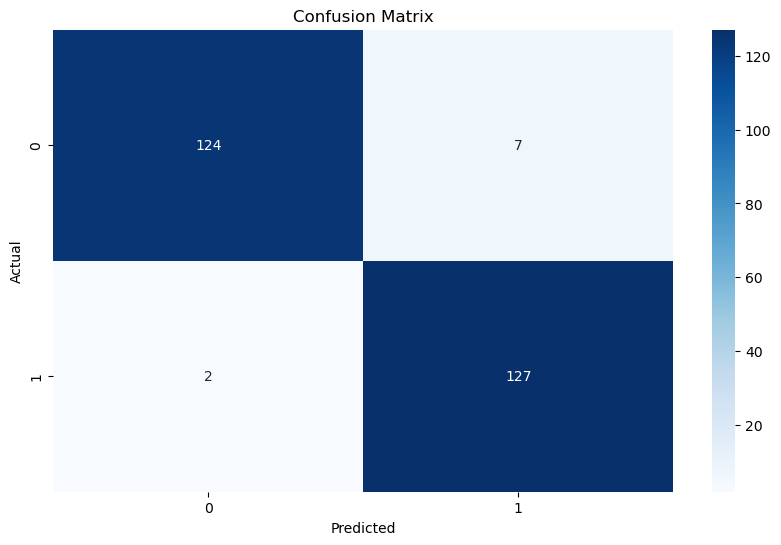

In [9]:

#visualize confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


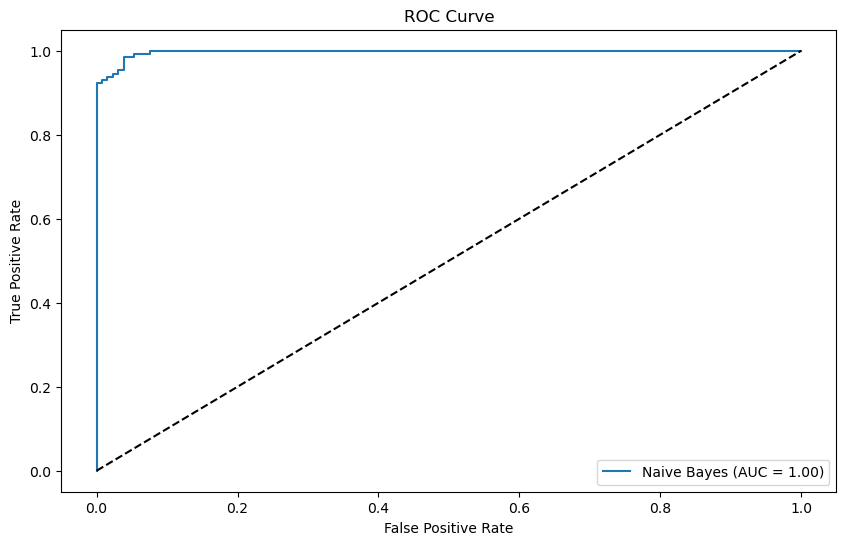

In [10]:

#ROC Curve
y_prob_nb = model_nb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_nb)
auc = roc_auc_score(y_test, y_prob_nb)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [11]:


# Save the model and vectorizer
joblib.dump(model_nb, 'nb_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']